In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Ecart-type d'une moyenne

En métrologie, lorsqu'on cherche à calculer une incertitude de type A, on 
utilise une série de mesures (de mesurages si on utilise le vocabulaire 
international de métrologie). La valeur de la mesure est alors la moyenne 
des valeurs obtenues lors de cette série de mesures. L'incertitude sur cette 
valeur moyenne est obtenue en calculant l'écart type des valeurs mesurées, 
divisée par la racine carré du nombre de mesures. Il s'agit en fait de l'écart 
type (la dispersion, et donc l'incertitude) de l'ensemble des moyennes que 
l'on pourrait obtenir à partir d'une série d'un nombre limité de mesures.

Considérons un échantillon de N valeurs de x uniformément réparties entre deux 
nombres a et b.


In [42]:
N = 15
a = 5
b = 7

Choisir aléatoirement N valeurs de x dans un intervalle donné.

In [43]:
x = np.random.uniform(a, b, N)
print(x)

[6.1717154  5.94009233 6.91043585 5.71688007 6.29436183 6.80032327
 5.47778954 6.73932082 6.67892449 5.23124038 6.01514763 5.89807019
 6.82465823 6.8299732  5.2078507 ]



Calculer la moyenne et l'écart type de ces N valeurs.

In [49]:
print(f"mean: {x.mean()}")
print(f"std_pop: {x.std()} (population, divide by N)")
print(f"std_sample: {x.std(ddof=1)} (sample, divide by N-1)")

mean: 6.182452261244405
std_pop: 0.5801278285242188 (population, divide by N)
std_sample: 0.6004893517209456 (sample, divide by N-1)


In [50]:
moyenne = x.mean()
std = x.std(ddof=1)


Diviser l'écart type par la racine carré de N. On appellera cette valeur u_x.

In [51]:
u_x = std / np.sqrt(N)
print(f"u_x: {u_x}")

u_x: 0.1550456839193407


Ces 15 valeurs représentent un échantillon des valeurs qu'on pourrait obtenir de la population totale (l'ensemble des valeurs).

In [55]:
np.random.seed(3012022)
for _ in range(5):
    x = np.random.uniform(a, b, N)
    print(f"moyenne: {x.mean():.4f}    ecart-type: {x.std(ddof=1):.4f}")

moyenne: 5.9486    ecart-type: 0.6837
moyenne: 6.0121    ecart-type: 0.5376
moyenne: 6.0749    ecart-type: 0.4884
moyenne: 6.1141    ecart-type: 0.5973
moyenne: 5.8909    ecart-type: 0.5302


Si la distribution des valeurs entre a et b est uniforme, la moyenne des valeurs de la population devrait être le milieu entre a et b. De même l'écart type d'une variable alatoire de distribution rectangulaire est $(b - a) / 2\sqrt 3$. 

On peut le vérifier en calculant la moyenne d'un échantillon de grande taille (ce qui se rapproche d'une population).

In [72]:
print("Valeurs attendues")
print(f"moyenne: {(a + b) / 2:.4f}    ecart-type: {(b - a) / (2 * np.sqrt(3)):.4f}")
print("Valeurs calculées")
x = np.random.uniform(a, b, 10_000)
print(f"moyenne: {x.mean():.4f}    ecart-type: {x.std(ddof=1):.4f}")

Valeurs attendues
moyenne: 1.0000    ecart-type: 0.5774
Valeurs calculées
moyenne: 5.9959    ecart-type: 0.5747


On peut voir comment la moyenne et l'écart type convergent vers les valeurs attendues.

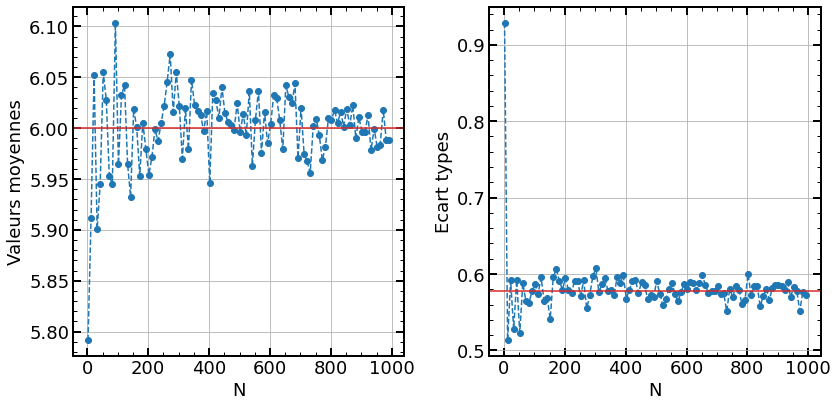

In [77]:
moyennes = list()
ecart_types = list()
for N in range(2, 1000, 10):
    x = np.random.uniform(a, b, N)
    moyennes.append(x.mean())
    ecart_types.append(x.std(ddof=1))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 1000, 10), moyennes, "o--")
plt.ylabel("Valeurs moyennes")
plt.xlabel("N")
plt.axhline((a + b) / 2, color="C3")

plt.subplot(1, 2, 2)
plt.plot(range(2, 1000, 10), ecart_types, "o--")
plt.ylabel("Ecart types")
plt.xlabel("N")
plt.axhline((b - a) / (2 * np.sqrt(3)), color="C3")

plt.tight_layout()

Nous allons maintenant calculer l'écart type des moyennes d'un ensemble d'échantillons de N valeurs. Si on utilise un seul échantillon, cet écart type est donné par l'écart type des N valeurs divisé par la racine carré de N.

* Tirer aléatoirement un grand nombre d'échantillons de N valeurs de x entre deux valeurs a et b.
* Pour chaque échantillon calculer la moyenne des valeurs de x.
* Représenter l'histogramme des ces valeurs moyennes, il doit être centré sur le milieu entre a et b.


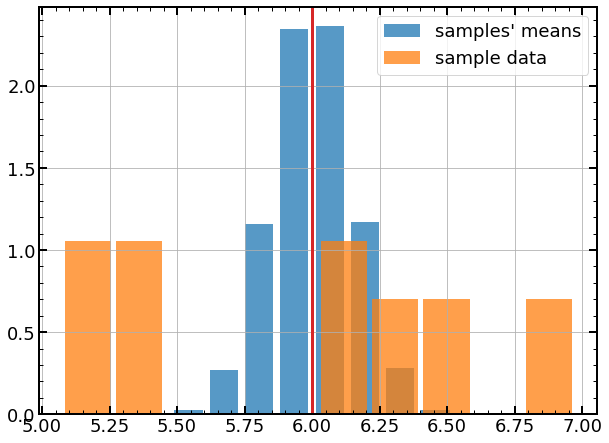

In [92]:
N = 15
a = 5
b = 7

# Compute data for one sample of N values betwee a and b
data = np.random.uniform(a, b, size=N)
sx = np.std(data, ddof=1)
u_x = sx / np.sqrt(N)

# Compute N_sample samples with N values each.
N_sample = 100_000
samples_data = np.random.uniform(a , b, size=(N_sample, N))
samples_mean = samples_data.mean(axis=1)

# compute the standard deviation over the samples' means
samples_mean_std = np.std(samples_mean, ddof=1)

# graphical representation
plt.hist(samples_mean, rwidth=.8, density=True, alpha=.75, label="samples' means")
plt.hist(data, rwidth=.9, color="C1", density=True, alpha=.75, label="sample data")
plt.axvline((a + b) / 2, color="C3", linewidth=3)
plt.legend();

Calculer l'écart type de ces valeurs moyennes et comparez le à la valeur de u_x calculée précédemment. Les deux valeurs doivent être proches si vous avez considéré un nombre suffisament grand d'échantillons.

In [93]:
print(f"     u_x: {u_x:.4f}")
print(f"mean std: {samples_mean_std:.4f}")

     u_x: 0.1639
mean std: 0.1492



Plus la taille de l'échantillon est grand, plus l'écart type sur la valeur 
moyenne sera petit. Il décroit avec la racine carré du nombre de valeurs. 
En effet, plus la taille de l'échantillon est grande, plus il est proche 
(représentatif) de la population dont il est extrait. La valeur moyenne 
calculée à partir de cet échantillon sera alors proche de la valeur moyenne 
de la population et deux échantillons différents auront des valeurs moyennes 
proches. L'écart type des valeurs mpyennes (la dispersion) sera alors faible.

Pour vérifier cette loi, on calcule l'écart type des valeurs moyennes pour 
des échantillons de taille N.

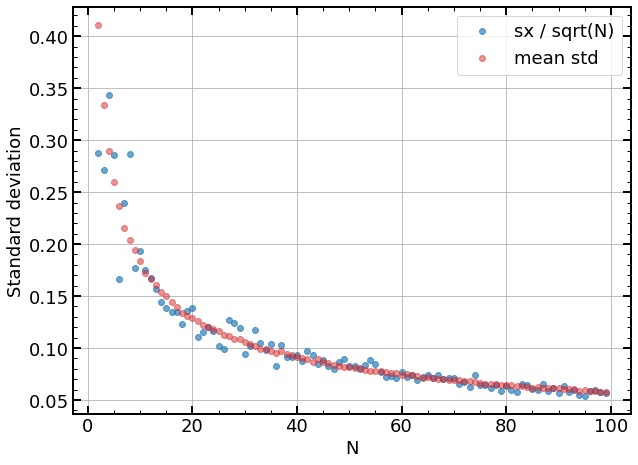

In [96]:
# interval
a = 5
b = 7

# maximum size of the sample
N_max = 100

u_x = list()
samples_mean_std = list()
for N in range(2, N_max):
    # Compute data for one sample of N values betwee a and b
    data = np.random.uniform(a, b, size=N)
    sx = np.std(data, ddof=1)
    u_x.append(sx / np.sqrt(N))

    # Compute N_sample samples with N values each.
    N_sample = 10_000
    samples_data = np.random.uniform(a , b, size=(N_sample, N))
    samples_mean = samples_data.mean(axis=1)

    # compute the standard deviation over the samples' means
    samples_mean_std.append(np.std(samples_mean, ddof=1))

# comparison between the standar deviation of the averages and
# the standard deviation of one sample of N values as a function N
plt.plot(range(2, N_max), u_x, 'C0o', alpha=0.66, label="sx / sqrt(N)")
plt.plot(range(2, N_max), samples_mean_std, 'C3o', alpha=0.5, label="mean std")
plt.legend()
plt.xlabel("N")
plt.ylabel("Standard deviation");